# Heap Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000])

## Algoritmo

In [2]:
def _heapify(heap:np.ndarray, start:int, max_pos:int):  
  pai = start
  while True:
    filho = 2 * pai + 1
    if filho > max_pos:
      break

    # Se ambos os filhos são posições válidas
    if filho + 1 <= max_pos and heap[filho] < heap[filho + 1]:
      filho += 1 # indica o maior filho
    
    if heap[pai] < heap[filho]:
      heap[pai], heap[filho] = heap[filho], heap[pai]
      pai = filho
    else:
      break


def in_place_heap(arr:np.ndarray):
  """In-place Heap sort
  =====================
  Utilizando uma heap máxima (o maior elemento fica na raiz).
  """
  N = len(arr)

  # range((len(lst)-2)/2, -1, -1) # da metade de arr até o início
  for start in range((N-2)//2).__reversed__():
    _heapify(arr, start, N-1)
 
  for end in range(N-1, 0, -1):
    arr[end], arr[0] = arr[0], arr[end]
    _heapify(arr, 0, end - 1)

## Bateria de testes de desempenho

In [3]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=float)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=float)[::-1].copy()
    else:
      amostra = np.random.sample(tamanho)
    
    # testando performance
    start = perf_counter()
    in_place_heap(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.027229,0.015122,0.015088,1000
0.069047,0.032000,0.029332,2000
0.067271,0.051131,0.054586,3000
0.072938,0.066896,0.090241,4000
0.103353,0.101804,0.087106,5000
0.153148,0.147006,0.152597,8000
0.216751,0.211889,0.203198,11000
0.327129,0.297275,0.295495,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma crescente


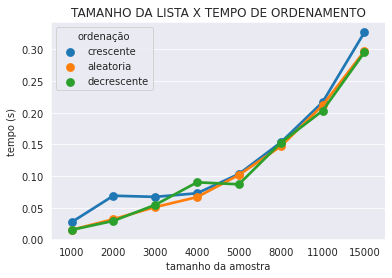

In [4]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')